In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env
import os

In [2]:
# Function to retrieve Codeup Curriculum Logs and cache as .csv file 
def get_logs_dataset():
    # creating the operating system filename for referencing
    filename = 'curriculum_logs.csv'
    if os.path.isfile(filename):
        df = pd.read_csv(filename)
        # let’s print the shape
        print(f'df shape: {df.shape}')
        return df
    else:
        # creating the corriculum logs url for to retrieve from MySQL
        url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
        # creating the MySQL query
        query = '''
                    SELECT date,
                    time,
                    path as endpoint,
                    user_id,
                    cohort_id,
                    ip,
                    name,
                    slack,
                    start_date,
                    end_date,
                    program_id
                    FROM curriculum_logs.logs
                    LEFT JOIN curriculum_logs.cohorts ON curriculum_logs.logs.cohort_id = curriculum_logs.cohorts.id;
                    '''
        # creating the df
        df = pd.read_sql(query, url)
        # cache the df to local repository
        df.to_csv("curriculum_logs.csv", index = False)
        return df

In [44]:
df = get_logs_dataset()
df.head()

df shape: (900223, 11)


,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0


In [4]:
df['timestamp'] = df['date'] + ' ' + df['time']
df.timestamp = pd.to_datetime(df.timestamp)
df = df.set_index('timestamp')
col = ['date','time']
df.drop(columns=col, inplace = True)
df['day'] = df.index.strftime('%A')
df['month'] = df.index.strftime('%B')
df.head()

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month
timestamp,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,Friday,January


In [5]:
# function that returns the endpoint class and topic
def get_endpoint_targets(df):
    topics = df['endpoint']. str.split('/',n = 1,expand = True).rename(columns = {0: 'class', 1: 'topic'})
    new_df = pd.concat([df, topics], axis = 1)
    # returns the new df w/endpoint class and topics
    return new_df

In [6]:
df = get_endpoint_targets(df)
df.head()

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic
timestamp,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,None
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,object-oriented-programming
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,slides,object_oriented_programming
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,Friday,January,javascript-i,conditionals


In [7]:
def map_program_id(df):
    df['program_type'] = df['program_id'].map(
        {1: 'FS_PHP_program',
        2: 'FS_JAVA_program',
        3: 'DS_program',
        4: 'Front_End_program',
        np.nan: np.nan})
    # returning the dataframe
    return df

In [8]:
df = map_program_id(df)
df.head()

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic,program_type
timestamp,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,,,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,None,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,object-oriented-programming,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,slides,object_oriented_programming,FS_PHP_program
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,#teddy,2018-01-08,2018-05-17,2.0,Friday,January,javascript-i,conditionals,FS_JAVA_program


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 900223 entries, 2018-01-26 09:55:03 to 2021-04-21 16:44:39
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   endpoint      900222 non-null  object 
 1   user_id       900223 non-null  int64  
 2   cohort_id     847330 non-null  float64
 3   ip            900223 non-null  object 
 4   name          847330 non-null  object 
 5   slack         847330 non-null  object 
 6   start_date    847330 non-null  object 
 7   end_date      847330 non-null  object 
 8   program_id    847330 non-null  float64
 9   day           900223 non-null  object 
 10  month         900223 non-null  object 
 11  class         900222 non-null  object 
 12  topic         731934 non-null  object 
 13  program_type  847330 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 103.0+ MB


### handle missing value

In [10]:
df.isnull().sum()

endpoint             1
user_id              0
cohort_id        52893
ip                   0
name             52893
slack            52893
start_date       52893
end_date         52893
program_id       52893
day                  0
month                0
class                1
topic           168289
program_type     52893
dtype: int64

In [70]:
df[df.endpoint.isnull()]

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic
timestamp,,,,,,,,,,,,,
2020-04-08 09:25:18,NaN,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Wednesday,April,NaN,NaN


In [71]:
df[df.ip == '72.177.240.51']

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic
timestamp,,,,,,,,,,,,,
2020-02-08 11:09:10,appendix/cli-git-overview,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Saturday,February,appendix,cli-git-overview
2020-02-08 11:09:22,appendix/cli/0-overview,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Saturday,February,appendix,cli/0-overview
2020-02-08 11:25:21,appendix/cli/0-overview,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Saturday,February,appendix,cli/0-overview
2020-02-08 11:25:21,appendix/cli/1-intro,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Saturday,February,appendix,cli/1-intro
2020-02-08 11:25:27,appendix/cli/2-listing-files,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Saturday,February,appendix,cli/2-listing-files
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-15 12:26:50,search/search_index.json,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Sunday,November,search,search_index.json
2020-11-15 12:27:01,fundamentals/functions,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Sunday,November,fundamentals,functions
2020-11-15 12:28:02,search/search_index.json,586,55.0,72.177.240.51,Curie,#curie,2020-02-03,2020-07-07,3.0,Sunday,November,search,search_index.json


In [ ]:
# drop the 1 row that endpoint = null

In [74]:
df[df.cohort_id.isnull()].isnull().sum()

endpoint            0
user_id             0
cohort_id       52893
ip                  0
name            52893
slack           52893
start_date      52893
end_date        52893
program_id      52893
day                 0
month               0
class               0
topic           22755
program_type    52893
dtype: int64

In [76]:
df[df.cohort_id.isnull()].groupby('ip').describe().T

ip                103.208.220.130  103.208.220.131  103.208.220.132  \
user_id    count              1.0              1.0              1.0   
           mean             369.0            369.0            369.0   
           std                NaN              NaN              NaN   
           min              369.0            369.0            369.0   
           25%              369.0            369.0            369.0   
           50%              369.0            369.0            369.0   
           75%              369.0            369.0            369.0   
           max              369.0            369.0            369.0   
cohort_id  count              0.0              0.0              0.0   
           mean               NaN              NaN              NaN   
           std                NaN              NaN              NaN   
           min                NaN              NaN              NaN   
           25%                NaN              NaN              NaN   
           50%                NaN              NaN              NaN   
           75%                NaN              NaN              NaN   
           max                NaN              NaN              NaN   
program_id count              0.0              0.0              0.0   
           mean               NaN              NaN              NaN   
           std                NaN              NaN              NaN   
           min                NaN              NaN              NaN   
           25%                NaN              NaN              NaN   
           50%                NaN              NaN              NaN   
           75%                NaN              NaN              NaN   
           max                NaN              NaN              NaN   

ip                103.208.220.133  103.208.220.137  103.208.220.139  \
user_id    count              1.0              1.0              2.0   
           mean             369.0            369.0            369.0   
           std                NaN              NaN              0.0   
           min              369.0            369.0            369.0   
           25%              369.0            369.0            369.0   
           50%              369.0            369.0            369.0   
           75%              369.0            369.0            369.0   
           max              369.0            369.0            369.0   
cohort_id  count              0.0              0.0              0.0   
           mean               NaN              NaN              NaN   
           std                NaN              NaN              NaN   
           min                NaN              NaN              NaN   
           25%                NaN              NaN              NaN   
           50%                NaN              NaN              NaN   
           75%                NaN              NaN              NaN   
           max                NaN              NaN              NaN   
program_id count              0.0              0.0              0.0   
           mean               NaN              NaN              NaN   
           std                NaN              NaN              NaN   
           min                NaN              NaN              NaN   
           25%                NaN              NaN              NaN   
           50%                NaN              NaN              NaN   
           75%                NaN              NaN              NaN   
           max                NaN              NaN              NaN   

ip                103.208.220.141  103.208.220.143  104.10.80.59  \
user_id    count              1.0              3.0           8.0   
           mean             369.0            369.0         353.0   
           std                NaN              0.0           0.0   
           min              369.0            369.0         353.0   
           25%              369.0            369.0         353.0   
           50%              369.0       

In [ ]:
# all the cohort_id = null rows also doesn't have program id

In [81]:
df[df.ip == '99.88.62.137'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116 entries, 2019-06-19 13:09:18 to 2020-06-10 15:46:55
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   endpoint      116 non-null    object 
 1   user_id       116 non-null    int64  
 2   cohort_id     0 non-null      float64
 3   ip            116 non-null    object 
 4   name          0 non-null      object 
 5   slack         0 non-null      object 
 6   start_date    0 non-null      object 
 7   end_date      0 non-null      object 
 8   program_id    0 non-null      float64
 9   day           116 non-null    object 
 10  month         116 non-null    object 
 11  class         116 non-null    object 
 12  topic         104 non-null    object 
 13  program_type  0 non-null      object 
dtypes: float64(2), int64(1), object(11)
memory usage: 13.6+ KB


### all the rest of null values represent some anomaly activities.

## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

<AxesSubplot:xlabel='name,class'>

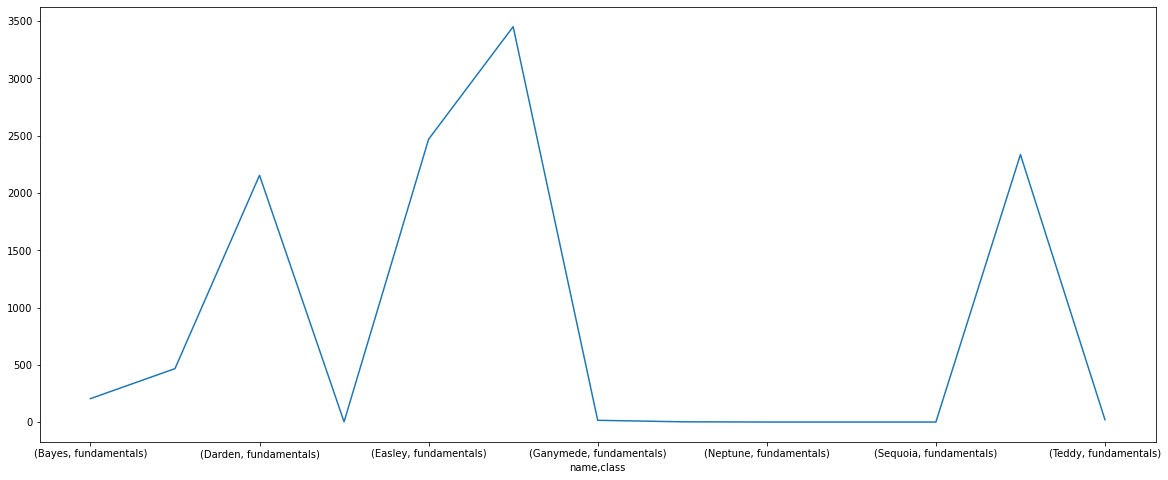

In [176]:
df[df['class'] == 'fundamentals'].groupby('name')['class'].value_counts().plot(figsize=(20,8))

In [178]:
df[df['class'] == 'classification'].groupby('name')['class'].value_counts()

name      class         
Bayes     classification     260
Curie     classification     401
Darden    classification    5030
Easley    classification    2715
Florence  classification     214
Staff     classification    2831
Teddy     classification       2
Name: class, dtype: int64

In [122]:
df['class'].value_counts().head(50)

javascript-i                  118723
html-css                       84935
mysql                          82320
jquery                         60869
spring                         58603
java-iii                       56733
java-ii                        55107
                               50313
java-i                         41158
javascript-ii                  38796
appendix                       36867
search                         19524
toc                            18297
examples                       14855
classification                 11476
fundamentals                   11162
1-fundamentals                 10159
content                         9308
sql                             9045
slides                          7700
3-sql                           7589
python                          6759
4-python                        5975
6-regression                    5953
5-stats                         4015
stats                           3943
regression                      3829
7

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

In [29]:
pages = df['endpoint'].resample('d').count()
pages.head()

timestamp
2018-01-26    572
2018-01-27    230
2018-01-28    170
2018-01-29    830
2018-01-30    652
Freq: D, Name: endpoint, dtype: int64

In [30]:
# set the window span
span = 30

# compute midband
midband = pages.ewm(span=span).mean()

midband.head()

timestamp
2018-01-26    572.000000
2018-01-27    395.300000
2018-01-28    315.139578
2018-01-29    457.002386
2018-01-30    501.369064
Freq: D, Name: endpoint, dtype: float64

In [31]:
stdev = pages.ewm(span=span).std()

stdev.head()

timestamp
2018-01-26           NaN
2018-01-27    241.830519
2018-01-28    213.878138
2018-01-29    316.467837
2018-01-30    284.479727
Freq: D, Name: endpoint, dtype: float64

In [32]:
ub = midband + stdev*2
lb = midband - stdev*2
ub, lb

(timestamp
 2018-01-26            NaN
 2018-01-27     878.961038
 2018-01-28     742.895854
 2018-01-29    1089.938060
 2018-01-30    1070.328518
                  ...     
 2021-04-17    2805.204187
 2021-04-18    2751.889069
 2021-04-19    2825.623313
 2021-04-20    2845.064711
 2021-04-21    2786.355225
 Freq: D, Name: endpoint, Length: 1182, dtype: float64,
 timestamp
 2018-01-26           NaN
 2018-01-27    -88.361038
 2018-01-28   -112.616698
 2018-01-29   -175.933288
 2018-01-30    -67.590389
                  ...    
 2021-04-17   -154.845956
 2021-04-18   -187.489435
 2021-04-19   -148.475267
 2021-04-20    -91.603636
 2021-04-21    -64.601316
 Freq: D, Name: endpoint, Length: 1182, dtype: float64)

In [33]:
# concatenate ub and lb together into one df, bb
bb = pd.concat([ub, lb], axis=1)

bb.columns = ['ub', 'lb']
bb.head()

,ub,lb
timestamp,,
2018-01-26,NaN,NaN
2018-01-27,878.961038,-88.361038
2018-01-28,742.895854,-112.616698
2018-01-29,1089.938060,-175.933288
2018-01-30,1070.328518,-67.590389


In [34]:
my_df = pd.concat([pages, midband, bb], axis=1)
my_df.columns = ['pages', 'midband', 'ub', 'lb']
my_df.head()

,pages,midband,ub,lb
timestamp,,,,
2018-01-26,572,572.000000,NaN,NaN
2018-01-27,230,395.300000,878.961038,-88.361038
2018-01-28,170,315.139578,742.895854,-112.616698
2018-01-29,830,457.002386,1089.938060,-175.933288
2018-01-30,652,501.369064,1070.328518,-67.590389


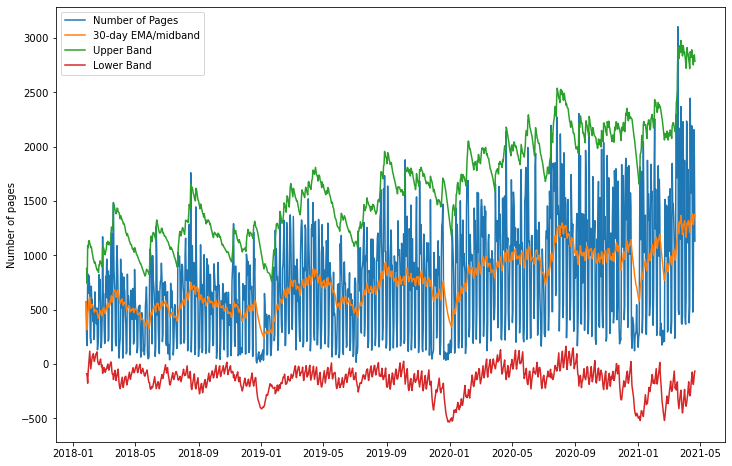

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(my_df.index, my_df.pages, label='Number of Pages')

ax.plot(my_df.index, my_df.midband, label = '30-day EMA/midband')
ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
ax.plot(my_df.index, my_df.lb, label = 'Lower Band')

ax.legend(loc='best')
ax.set_ylabel('Number of pages')

plt.show()

In [36]:
# get the value of the last record
last_measure = my_df.iloc[-1].pages
last_measure

1131.0

In [37]:
# get the lower band value on the last date
last_lb = my_df.iloc[-1].lb
last_lb

-64.60131597531745

In [38]:
# get the upper band value on the last date
last_ub = my_df.iloc[-1].ub
last_ub

2786.3552246649692

In [39]:
# compute %b
last_pct_b = (last_measure - last_lb)/(last_ub - last_lb)

print('%b for last datapoint: ', round(last_pct_b, 2))

%b for last datapoint:  0.42


In [40]:
my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])

my_df.head()

,pages,midband,ub,lb,pct_b
timestamp,,,,,
2018-01-26,572,572.000000,NaN,NaN,NaN
2018-01-27,230,395.300000,878.961038,-88.361038,0.329116
2018-01-28,170,315.139578,742.895854,-112.616698,0.330348
2018-01-29,830,457.002386,1089.938060,-175.933288,0.794657
2018-01-30,652,501.369064,1070.328518,-67.590389,0.632374


In [41]:
my_df[my_df['pct_b']>1]

,pages,midband,ub,lb,pct_b
timestamp,,,,,
2018-02-27,1171,496.375166,1077.905985,-85.155652,1.080042
2018-03-20,1486,665.021495,1472.918024,-142.875035,1.008096
2018-05-30,1056,400.137163,1018.214066,-217.939741,1.030567
2018-07-23,1027,435.495343,1010.366096,-139.375411,1.014468
2018-08-17,1760,751.910516,1655.512283,-151.691251,1.057817
2018-11-08,1291,561.449002,1248.899313,-126.001309,1.030621
2019-01-28,1232,447.643274,1168.205223,-272.918675,1.044267
2019-07-08,1225,479.213223,1215.420161,-256.993715,1.006506
2019-10-07,1879,803.738383,1792.312562,-184.835797,1.043845


In [45]:
def prep(df, user):
    df = df[df.user_id == user]
    df['timestamp'] = df['date'] + ' ' + df['time']
    df.timestamp = pd.to_datetime(df.timestamp)
    df = df.set_index('timestamp')
    col = ['date','time']
    df.drop(columns=col, inplace = True)
    pages = df['endpoint'].resample('d').count()
    return pages

def compute_pct_b(pages, span, weight, user):
    midband = pages.ewm(span=span).mean()
    stdev = pages.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    bb = pd.concat([ub, lb], axis=1)
    my_df = pd.concat([pages, midband, bb], axis=1)
    my_df.columns = ['pages', 'midband', 'ub', 'lb']
    my_df['pct_b'] = (my_df['pages'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

def plt_bands(my_df, user):
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

def find_anomalies(df, user, span, weight):
    pages = prep(df, user)
    my_df = compute_pct_b(pages, span, weight, user)
    # plt_bands(my_df, user)
    return my_df[my_df.pct_b>1]


In [60]:
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)

In [61]:
anomalies.pages.value_counts(sort=False)

54     10
68      6
13     50
25     25
44     12
       ..
179     1
150     1
88      1
122     1
103     1
Name: pages, Length: 140, dtype: int64

In [63]:
anomalies[anomalies.pages > 200]

,pages,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2020-07-22,285,44.915959,266.290617,-176.458698,1.042257,11
2018-12-19,225,20.831494,216.533997,-174.871009,1.021630,313
2019-03-03,272,24.721632,232.200343,-182.757078,1.095913,341
2019-07-25,253,34.698961,222.709718,-153.311796,1.080555,422
2020-04-05,232,32.133967,205.731770,-141.463837,1.075658,570
2020-04-16,271,44.194413,267.834945,-179.446120,1.007076,570


In [66]:
anomalies[anomalies.user_id==11]

,pages,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2018-12-17,97,10.778722,85.136992,-63.579548,1.079769,11
2019-05-07,126,20.394919,115.779945,-74.990106,1.053573,11
2020-02-04,71,13.902738,69.434283,-41.628807,1.014098,11
2020-07-22,285,44.915959,266.290617,-176.458698,1.042257,11
2021-02-22,78,12.877736,77.587641,-51.832169,1.003186,11


In [67]:
df[df.user_id==11]

,date,time,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id
30,2018-01-26,10:14:47,/,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,1.0
31,2018-01-26,10:14:51,javascript-i,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,1.0
33,2018-01-26,10:15:02,javascript-i/functions,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,1.0
134,2018-01-26,11:46:29,appendix/further-reading/javascript/hoisting.html,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,1.0
136,2018-01-26,11:46:39,appendix,11,1.0,97.105.19.61,Arches,#arches,2014-02-04,2014-04-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...
900020,2021-04-21,14:21:05,fundamentals/diagram-of-ds-pipeline-fraud-exam...,11,28.0,76.185.131.226,Staff,#,2014-02-04,2014-02-04,2.0
900021,2021-04-21,14:21:05,fundamentals/ml-methodologies-drawing.jpg,11,28.0,76.185.131.226,Staff,#,2014-02-04,2014-02-04,2.0
900022,2021-04-21,14:21:05,fundamentals/modern-data-scientist.jpg,11,28.0,76.185.131.226,Staff,#,2014-02-04,2014-02-04,2.0
900023,2021-04-21,14:21:05,fundamentals/AI-ML-DL-timeline.jpg,11,28.0,76.185.131.226,Staff,#,2014-02-04,2014-02-04,2.0


In [ ]:
df[df.user_id==422].

In [11]:
def one_user_df_prep(df, user):
    '''
    This function returns a dataframe consisting of data for only a single defined user
    '''
    df = df[df.user_id == user]
    pages_one_user = df['endpoint'].resample('d').count()
    return pages_one_user

In [12]:
def compute_pct_b(pages_one_user, span, weight, user):
    '''
    This function adds the %b of a bollinger band range for the page views of a single user's log activity
    '''
    # Calculate upper and lower bollinger band
    midband = pages_one_user.ewm(span=span).mean()
    stdev = pages_one_user.ewm(span=span).std()
    ub = midband + stdev*weight
    lb = midband - stdev*weight
    
    # Add upper and lower band values to dataframe
    bb = pd.concat([ub, lb], axis=1)
    
    # Combine all data into a single dataframe
    my_df = pd.concat([pages_one_user, midband, bb], axis=1)
    my_df.columns = ['pages_one_user', 'midband', 'ub', 'lb']
    
    # Calculate percent b and relevant user id to dataframe
    my_df['pct_b'] = (my_df['pages_one_user'] - my_df['lb'])/(my_df['ub'] - my_df['lb'])
    my_df['user_id'] = user
    return my_df

In [13]:
def plot_bands(my_df, user):
    '''
    This function plots the bolliger bands of the page views for a single user
    '''
    fig, ax = plt.subplots(figsize=(12,8))
    ax.plot(my_df.index, my_df.pages_one_user, label='Number of Pages, User: '+str(user))
    ax.plot(my_df.index, my_df.midband, label = 'EMA/midband')
    ax.plot(my_df.index, my_df.ub, label = 'Upper Band')
    ax.plot(my_df.index, my_df.lb, label = 'Lower Band')
    ax.legend(loc='best')
    ax.set_ylabel('Number of Pages')
    plt.show()

In [14]:
def find_anomalies(df, username, span, weight, plot=False):
    '''
    This function returns the records where a user's daily activity exceeded the upper limit of a bollinger band range
    '''
    
    # Reduce dataframe to represent a single user
    pages_one_user = one_user_df_prep(df, user)
    
    # Add bollinger band data to dataframe
    my_df = compute_pct_b(pages_one_user, span, weight, user)
    
    # Plot data if requested (plot=True)
    if plot:
        plot_bands(my_df, user)
    
    # Return only records that sit outside of bollinger band upper limit
    return my_df[my_df.pct_b>1]

In [305]:
# user = 6
# span = 30
# weight = 3
# user_df = find_anomalies(df, user, span, weight)

# anomalies = pd.DataFrame()
# user_df = find_anomalies(df, user, span, weight)
# anomalies = pd.concat([anomalies, user_df], axis=0)
# anomalies.head()

,pages_one_user,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2018-06-02,74,6.690055,62.981626,-49.601515,1.097869,6
2019-03-18,17,1.096774,13.840139,-11.646591,1.123981,6


In [15]:
span = 30
weight = 3

anomalies = pd.DataFrame()
for u in list(df.user_id.unique()):
    user_df = find_anomalies(df, u, span, weight)
    anomalies = pd.concat([anomalies, user_df], axis=0)
anomalies

NameError: name 'user' is not defined

In [223]:
anomalies.sort_values(by='pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
timestamp,,,,,,
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
2019-07-08,101,8.248768,96.507472,-80.009936,1.025451,1
...,...,...,...,...,...,...
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1
2019-01-29,44,3.623334,42.081344,-34.834677,1.024945,1


<AxesSubplot:xlabel='timestamp'>

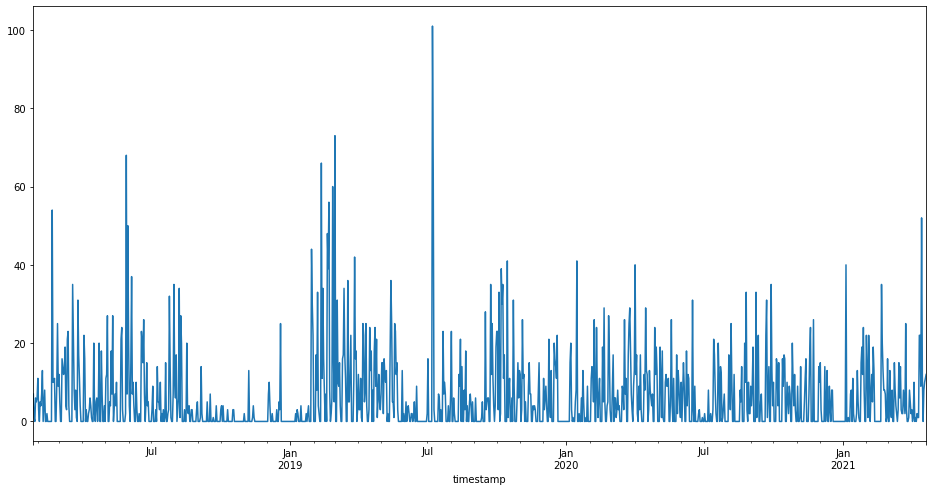

In [224]:
df_1 = one_user_df_prep(df, 1)
df_1.plot(figsize=(16,8))

In [225]:
anomalies.user_id.value_counts()

1    1962
Name: user_id, dtype: int64

In [226]:
df[df.user_id == 1].name.value_counts()

Staff      5787
Hampton    1617
Name: name, dtype: int64

In [290]:
df[(df.user_id == 1) & (df.name == 'Hampton')].head()

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic,program_type
timestamp,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,,,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,None,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,object-oriented-programming,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,slides,object_oriented_programming,FS_PHP_program
2018-01-26 10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,javascript-i,functions,FS_PHP_program


In [213]:
df[(df.user_id == 1) & (df.name == 'Hampton')].ip.value_counts()

97.105.19.61      1016
97.105.19.58       338
72.177.226.58      242
172.56.15.15         8
72.177.229.125       4
172.56.15.203        3
172.56.15.50         2
97.98.16.4           2
172.56.15.6          1
172.56.15.46         1
Name: ip, dtype: int64

In [283]:
# check the total ip count
df.ip.value_counts()

97.105.19.58       284579
97.105.19.61        61662
192.171.117.210      9515
71.150.217.33        6791
76.185.145.231       4754
                    ...  
172.58.109.140          1
99.203.213.59           1
99.203.212.173          1
173.239.198.246         1
72.181.124.244          1
Name: ip, Length: 5531, dtype: int64

In [ ]:
# 97.105.19.61 and 97.105.19.58 is codeup ip address

In [294]:
df[df.name == 'Hampton']

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic,program_type
timestamp,,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,,,FS_PHP_program
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,None,FS_PHP_program
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,java-ii,object-oriented-programming,FS_PHP_program
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,slides,object_oriented_programming,FS_PHP_program
2018-01-26 10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Friday,January,javascript-i,functions,FS_PHP_program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23 10:18:07,content/javascript/arrays/gitbook/images/favic...,646,8.0,173.174.197.146,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Thursday,April,content,javascript/arrays/gitbook/images/favicon.ico,FS_PHP_program
2020-04-23 10:18:47,content/javascript/arrays/iterating.html,646,8.0,173.174.197.146,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Thursday,April,content,javascript/arrays/iterating.html,FS_PHP_program
2020-04-23 10:19:24,content/javascript/functions.html,646,8.0,173.174.197.146,Hampton,#hampton,2015-09-22,2016-02-06,1.0,Thursday,April,content,javascript/functions.html,FS_PHP_program


In [287]:
df[df.ip == '72.177.226.58']['endpoint'].resample('d').count()

timestamp
2018-01-27    1
2018-01-28    0
2018-01-29    0
2018-01-30    0
2018-01-31    0
             ..
2018-08-15    0
2018-08-16    0
2018-08-17    0
2018-08-18    3
2018-08-19    2
Freq: D, Name: endpoint, Length: 205, dtype: int64

In [291]:
df[df.ip == '72.177.226.58']['class'].value_counts()

java-ii             45
                    41
java-i              30
appendix            22
html-css            21
java-iii            19
spring              16
slides              13
mysql               10
jquery               6
single-page.html     4
javascript-ii        3
content              3
mkdocs               2
javascript-i         2
prework              1
css                  1
examples             1
toc                  1
teams                1
Name: class, dtype: int64

* Hampton cohort's date is 2015-09-22 to 2016-02-06, this ip address consistently accessing the curriculum from 2018-01-27 to 2018-08-19 

In [236]:
df.isnull().sum()

endpoint             1
user_id              0
cohort_id        52893
ip                   0
name             52893
slack            52893
start_date       52893
end_date         52893
program_id       52893
day                  0
month                0
class                1
topic           168289
program_type     52893
dtype: int64

In [238]:
df[df.cohort_id.isnull()]

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic,program_type
timestamp,,,,,,,,,,,,,,
2018-01-26 16:46:16,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,Friday,January,,,NaN
2018-01-26 16:46:24,spring/extra-features/form-validation,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,Friday,January,spring,extra-features/form-validation,NaN
2018-01-26 17:54:24,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,Friday,January,,,NaN
2018-01-26 18:32:03,/,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,Friday,January,,,NaN
2018-01-26 18:32:17,mysql/relationships/joins,48,NaN,97.105.19.61,NaN,NaN,NaN,NaN,NaN,Friday,January,mysql,relationships/joins,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-21 12:49:00,javascript-ii,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,Wednesday,April,javascript-ii,None,NaN
2021-04-21 12:49:02,javascript-ii/es6,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,Wednesday,April,javascript-ii,es6,NaN
2021-04-21 12:51:27,javascript-ii/map-filter-reduce,717,NaN,136.50.102.126,NaN,NaN,NaN,NaN,NaN,Wednesday,April,javascript-ii,map-filter-reduce,NaN


In [240]:
df[df.cohort_id.isnull()].ip.value_counts().head(20)

97.105.19.58      15931
70.117.16.60       1903
67.11.117.74       1729
70.94.165.107      1715
23.116.170.48      1616
69.58.159.196      1602
66.25.163.198      1502
70.123.200.120     1320
97.105.19.61       1132
76.185.211.152     1120
104.182.13.78      1111
70.121.134.234     1031
136.50.11.90        961
66.69.62.219        934
173.173.113.51      796
45.23.250.16        741
23.127.174.233      718
70.123.200.67       694
108.208.56.254      622
24.243.64.3         601
Name: ip, dtype: int64

In [280]:
df[df.cohort_id.isnull()].endpoint.value_counts()

/                                          4459
search/search_index.json                   1985
javascript-i                                780
toc                                         706
spring                                      641
                                           ... 
4-python/intro-to-sklearn                     1
12-advanced-topics/3.3-building-a-model       1
10-nlp/exercises                              1
7-clustering/3-wrangle                        1
appendix/further-reading/jquery/effects       1
Name: endpoint, Length: 1112, dtype: int64

In [266]:
df[df.ip == '97.105.19.58'].describe()

,user_id,cohort_id,program_id
count,284579.000000,268648.000000,268648.000000
mean,356.126622,33.075932,2.040916
std,141.230184,10.942228,0.349878
min,1.000000,1.000000,1.000000
25%,270.000000,27.000000,2.000000
50%,369.000000,31.000000,2.000000
75%,469.000000,34.000000,2.000000
max,629.000000,57.000000,3.000000


In [278]:
df[df.ip == '97.105.19.58']

,endpoint,user_id,cohort_id,ip,name,slack,start_date,end_date,program_id,day,month,class,topic,program_type
timestamp,,,,,,,,,,,,,,
2018-07-16 07:51:57,javascript-ii/promises,211,1.0,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,1.0,Monday,July,javascript-ii,promises,FS_PHP_program
2018-07-16 07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,1.0,Monday,July,javascript-ii,map-filter-reduce,FS_PHP_program
2018-07-16 07:59:50,javascript-ii/promises,211,1.0,97.105.19.58,Arches,#arches,2014-02-04,2014-04-22,1.0,Monday,July,javascript-ii,promises,FS_PHP_program
2018-07-16 08:07:37,index.html,53,14.0,97.105.19.58,Lassen,#lassen,2016-07-18,2016-11-10,1.0,Monday,July,index.html,None,FS_PHP_program
2018-07-16 08:07:41,javascript-ii,53,14.0,97.105.19.58,Lassen,#lassen,2016-07-18,2016-11-10,1.0,Monday,July,javascript-ii,None,FS_PHP_program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-23 15:10:09,toc,625,57.0,97.105.19.58,Ganymede,#ganymede,2020-03-23,2020-08-20,2.0,Monday,March,toc,None,FS_JAVA_program
2020-03-23 15:10:18,toc,623,57.0,97.105.19.58,Ganymede,#ganymede,2020-03-23,2020-08-20,2.0,Monday,March,toc,None,FS_JAVA_program
2020-03-23 15:20:39,/,627,57.0,97.105.19.58,Ganymede,#ganymede,2020-03-23,2020-08-20,2.0,Monday,March,,,FS_JAVA_program


In [244]:
df[df.ip == '70.117.16.60'].describe()

,user_id,cohort_id,program_id
count,1903.000000,0.0,0.0
mean,715.611140,NaN,NaN
std,11.991766,NaN,NaN
min,346.000000,NaN,NaN
25%,716.000000,NaN,NaN
50%,716.000000,NaN,NaN
75%,716.000000,NaN,NaN
max,716.000000,NaN,NaN


In [247]:
df[df.ip == '70.117.16.60']['endpoint'].resample('d').count()

timestamp
2020-07-20     8
2020-07-21    22
2020-07-22     8
2020-07-23    18
2020-07-24    25
              ..
2021-02-17    27
2021-02-18     0
2021-02-19     0
2021-02-20     0
2021-02-21     1
Freq: D, Name: endpoint, Length: 217, dtype: int64

In [250]:
df[df.ip == '70.117.16.60']['class'].value_counts()

javascript-i     434
jquery           247
html-css         219
spring           128
                 126
java-iii         115
mysql            113
java-ii           95
javascript-ii     91
java-i            86
appendix          80
toc               61
capstone          45
examples          34
search            23
web-design         4
slides             2
Name: class, dtype: int64

In [252]:
df[df.ip == '67.11.117.74'].describe()

,user_id,cohort_id,program_id
count,1729.000000,0.0,0.0
mean,732.481781,NaN,NaN
std,25.845312,NaN,NaN
min,719.000000,NaN,NaN
25%,719.000000,NaN,NaN
50%,719.000000,NaN,NaN
75%,719.000000,NaN,NaN
max,782.000000,NaN,NaN


In [253]:
df[df.ip == '67.11.117.74']['endpoint'].resample('d').count()

timestamp
2020-07-21    14
2020-07-22     9
2020-07-23    24
2020-07-24     9
2020-07-25     0
              ..
2020-12-16     8
2020-12-17    12
2020-12-18     0
2020-12-19     0
2020-12-20     1
Freq: D, Name: endpoint, Length: 153, dtype: int64

In [254]:
df[df.ip == '67.11.117.74']['class'].value_counts()

javascript-i     235
html-css         233
java-iii         180
java-ii          175
mysql            151
jquery           141
spring           136
java-i            90
                  89
appendix          77
javascript-ii     66
search            59
examples          40
capstone          20
toc               18
prework            6
web-design         6
forms              3
css-i              1
assets             1
elements           1
slides             1
Name: class, dtype: int64

In [255]:
df[df.ip == '70.94.165.107'].describe()

,user_id,cohort_id,program_id
count,1715.000000,0.0,0.0
mean,736.384840,NaN,NaN
std,26.996867,NaN,NaN
min,727.000000,NaN,NaN
25%,727.000000,NaN,NaN
50%,727.000000,NaN,NaN
75%,727.000000,NaN,NaN
max,814.000000,NaN,NaN


In [259]:
df[df.ip == '70.94.165.107']['endpoint'].resample('d').count()

timestamp
2020-07-21    11
2020-07-22     1
2020-07-23    18
2020-07-24     7
2020-07-25     0
              ..
2021-02-25     0
2021-02-26     0
2021-02-27     0
2021-02-28     0
2021-03-01     1
Freq: D, Name: endpoint, Length: 224, dtype: int64

In [260]:
df[df.ip == '70.94.165.107']['class'].value_counts()

javascript-i                287
jquery                      211
mysql                       179
java-ii                     174
spring                      160
java-iii                    160
html-css                    151
java-i                      100
javascript-ii                89
search                       74
appendix                     43
capstone                     34
examples                     30
web-design                   15
                              3
toc                           2
angular                       2
professional-development      1
Name: class, dtype: int64

In [282]:
df[df.ip == '23.116.170.48'].describe()

,user_id,cohort_id,program_id
count,1616.0,0.0,0.0
mean,736.0,NaN,NaN
std,0.0,NaN,NaN
min,736.0,NaN,NaN
25%,736.0,NaN,NaN
50%,736.0,NaN,NaN
75%,736.0,NaN,NaN
max,736.0,NaN,NaN
